# Pokemon API

This is primarily for exploring the pokemon api at https://pokeapi.co/ for a bit of fun.

In [120]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
import requests
import json
from IPython.core.display import Image, display
from IPython.display import Image, Markdown
import random

#### A wild Rattata appeared!

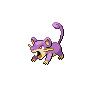

In [121]:
generations = [151, 252, 802]
pokemon_number = random.randint(1, generations[1])

pokemon_url = 'http://pokeapi.co/api/v2/pokemon/{}/'.format(pokemon_number)
response_json = requests.get(pokemon_url).json()

pokemon_name = response_json['name'].title()
sprites = response_json['sprites']
sprite_url = sprites['front_default']

display(Markdown("#### A wild {} appeared!".format(pokemon_name)))
display(Image(sprite_url))

In [122]:
for sprite_name in sprites:
    sprite_url = sprites[sprite_name]
    if sprite_url is not None:
        display(Image(url=sprite_url))

In [123]:
pokemon_move = response_json['moves'][0]['move']['name'].title()
display(Markdown("#### {} just learned {}!".format(pokemon_name, pokemon_move)))

#### Rattata just learned Cut!

In [115]:
pokemon_moves = response_json['moves']

display(Markdown("#### These are the moves {} can learn:\n".format(pokemon_name)))

for move in pokemon_moves:
    move_name = move['move']['name'].title()
    level_learned_at = move['version_group_details'][0]['level_learned_at']
    print('{0:15}{1}'.format(move_name, level_learned_at))

#### These are the moves Gastly can learn:


Fire-Punch     0
Ice-Punch      0
Thunder-Punch  0
Disable        0
Mega-Drain     0
Thunderbolt    0
Thunder        0
Toxic          0
Psychic        0
Hypnosis       1
Rage           0
Night-Shade    15
Mimic          0
Double-Team    0
Confuse-Ray    19
Haze           0
Bide           0
Self-Destruct  0
Lick           1
Smog           0
Dream-Eater    0
Psywave        0
Explosion      0
Rest           0
Substitute     0
Thief          0
Nightmare      47
Snore          0
Curse          12
Spite          0
Protect        0
Scary-Face     0
Sludge-Bomb    0
Zap-Cannon     0
Destiny-Bond   40
Perish-Song    0
Icy-Wind       0
Giga-Drain     0
Endure         0
Swagger        0
Mean-Look      8
Attract        0
Sleep-Talk     0
Return         0
Frustration    0
Pain-Split     0
Hidden-Power   0
Rain-Dance     0
Sunny-Day      0
Psych-Up       0
Shadow-Ball    0
Uproar         0
Torment        0
Will-O-Wisp    0
Facade         0
Taunt          0
Trick          0
Knock-Off      0
Skill-Swa

In [124]:
display(Markdown("#### {}'s base stats".format(pokemon_name)))

stats_json = response_json['stats']

base_stats = {}
for stat in stats_json:
    stat_name = stat['stat']['name'].title()
    base_stat = stat['base_stat']
    print("{0:15}  {1}".format(stat_name, base_stat))

#### Rattata's base stats

Speed            72
Special-Defense  35
Special-Attack   25
Defense          35
Attack           56
Hp               30


In [125]:
pokemon_index = random.sample(range(1, 100), 3)

df = DataFrame()

responses = []
for index in pokemon_index:
    response_json = requests.get('http://pokeapi.co/api/v2/pokemon/{}/'.format(index)).json()
    name = response_json['name'].title()
    print(name)
    for stat in response_json['stats']:
        stat_name = stat['stat']['name']
        base_stat = stat['base_stat']
        print("{0:15}  {1}".format(stat_name, base_stat))
    print()

Charizard
speed            100
special-defense  85
special-attack   109
defense          78
attack           84
hp               78

Charmeleon
speed            80
special-defense  65
special-attack   80
defense          58
attack           64
hp               58

Meowth
speed            90
special-defense  40
special-attack   40
defense          35
attack           45
hp               40



Possible Ideas: 

Graph the stats amongst each of the pokemon to determine who is best for attack, defense, etc

In [118]:
res = requests.get("http://pokeapi.co/api/v2/location/67/").json()
print(json.dumps(res, indent=4))

{
    "name": "celadon-city",
    "region": {
        "url": "http://pokeapi.co/api/v2/region/1/",
        "name": "kanto"
    },
    "game_indices": [
        {
            "generation": {
                "url": "http://pokeapi.co/api/v2/generation/4/",
                "name": "generation-iv"
            },
            "game_index": 144
        }
    ],
    "names": [
        {
            "name": "Celadon City",
            "language": {
                "url": "http://pokeapi.co/api/v2/language/9/",
                "name": "en"
            }
        },
        {
            "name": "C\u00e9ladopole",
            "language": {
                "url": "http://pokeapi.co/api/v2/language/5/",
                "name": "fr"
            }
        }
    ],
    "id": 67,
    "areas": [
        {
            "url": "http://pokeapi.co/api/v2/location-area/558/",
            "name": "celadon-city-area"
        },
        {
            "url": "http://pokeapi.co/api/v2/location-area/283/",
         

In [119]:
r = requests.get('http://pokeapi.co/api/v2/pokemon/1/')
json_j = r.json()

for attr in json_j:
    print(attr)

forms
abilities
stats
name
weight
moves
sprites
held_items
location_area_encounters
height
is_default
species
id
order
game_indices
base_experience
types
